Average Power (mW) for Modem: 793.8805714285713 mW
Average Power (mW) for RFE: 23.310285714285715 mW
Average Power (mW) for mmWave: 1.1928000000000003 mW
Average Power (mW) for Display: 139.12577142857143 mW
Average Power (mW) for Modem: 791.1422285714286 mW
Average Power (mW) for RFE: 24.349942857142857 mW
Average Power (mW) for mmWave: 1.1857714285714285 mW
Average Power (mW) for Display: 138.64691428571425 mW
Average Power (mW) for Modem: 784.7387428571428 mW
Average Power (mW) for RFE: 23.2244 mW
Average Power (mW) for mmWave: 1.1785142857142858 mW
Average Power (mW) for Display: 139.82165714285713 mW


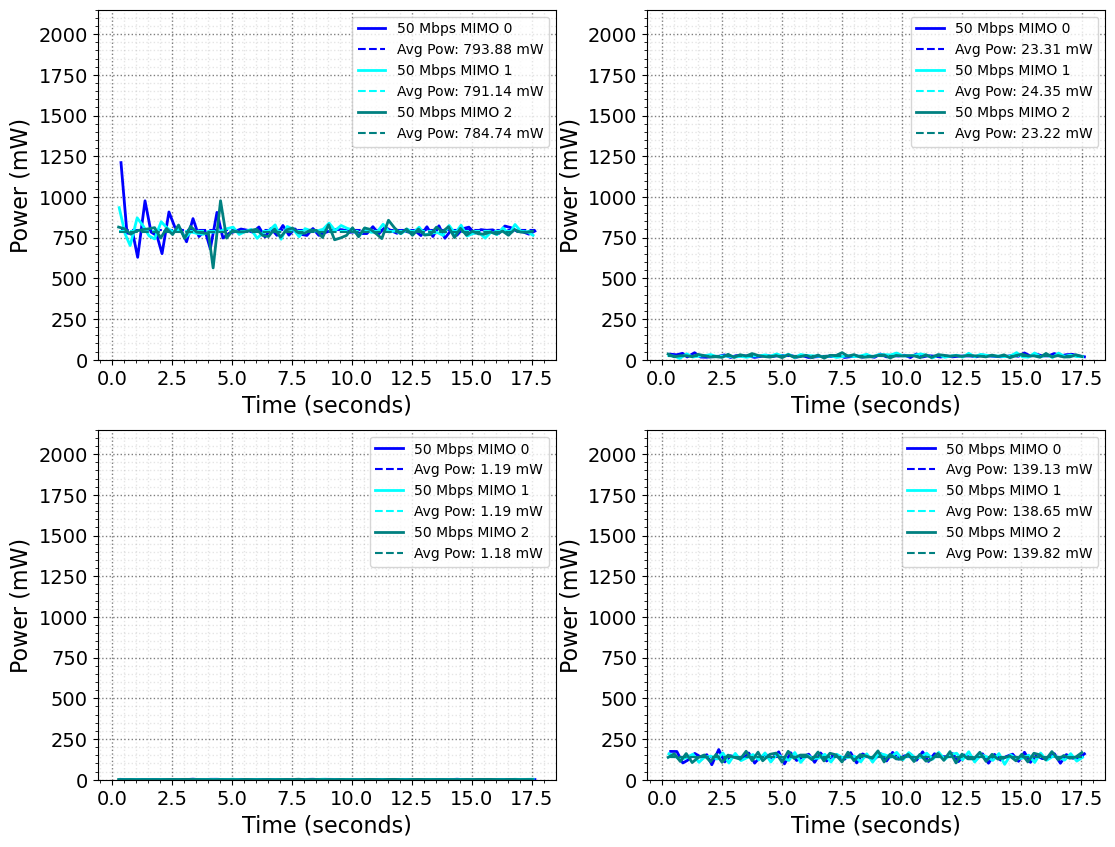

In [1]:
from perfetto.trace_processor import TraceProcessor
import numpy as np
import matplotlib.pyplot as plt

# Initialise TraceProcessor with a trace file
tp_list= []
# color_list = ['red','orange','green']
# color_list.append(['red','orange','green'])
# color_list = ['blue','cyan','springgreen','lime','teal']
color_list = ['blue','cyan','teal','red','pink','salmon']
# color_list = ['blue','cyan','teal','gold','orange','bisque','red','pink','salmon']
line_list = ['-','-','-','-','-','-','-','-','-','-','-','-','-']
enable_legend = False
legend_list = ["50 Mbps MIMO 0","50 Mbps MIMO 1","50 Mbps MIMO 2"]

tp_list.append(TraceProcessor(trace='50mbps_mimo_0.perfetto-trace')) #10-15 dBm
tp_list.append(TraceProcessor(trace='50mbps_mimo_1.perfetto-trace')) #10-15 dBm
tp_list.append(TraceProcessor(trace='50mbps_mimo_2.perfetto-trace')) #10-15 dBm

num_tps = len(tp_list)

# qr_it_list = [tp.query('SELECT * FROM counter_track') for tp in tp_list]
# qr_it_list_pandas = [qr_it.as_pandas_dataframe() for qr_it in qr_it_list]

id_mapper = [2,3,1,13]
string_mapper = ["Modem","RFE","mmWave","Display"]

df_list_cleaned = [[tp.query('SELECT ts,value FROM counter WHERE track_id='+str(i)+'')
                   .as_pandas_dataframe().replace(np.nan,0)
                   .values.tolist() for i in id_mapper] for tp in tp_list]




# string_mapper_AS = ["Cellular (Total)","Display"]
plt.rcParams['figure.figsize'] = [13, 10]
initial_offset = 2
end_offset = 72

for tp_idx in range(num_tps):
    df_np = np.array(df_list_cleaned[tp_idx])
    df_np[:,:,0] = df_np[:,:,0] - np.tile(df_np[:,0,0],[df_np.shape[1],1]).T
#     df_np[:,:,:,0] = df_np[:,:,:,0] - np.tile(df_np[:,:,0,0],[df_np.shape[2],1,1]).transpose(1,2,0) 
    df_np[:,:,0] = df_np[:,:,0]/1e9
    
    for i in range(1,5):
        x_vals = df_np[i-1,:,0]
        y_vals = df_np[i-1,:,1]
        x_vals = x_vals[:min(x_vals.size,end_offset)]
        y_vals = y_vals[:min(y_vals.size,end_offset)]
        delta_y_vals = np.copy(y_vals)
        delta_y_vals[1:] = delta_y_vals[1:]-delta_y_vals[0:y_vals.size-1]
        delta_y_vals[0] = 0
        avg_pow_indiv = np.mean(delta_y_vals[initial_offset:]*(4/1000))
        print("Average Power (mW) for "+str(string_mapper[i-1])+": "+str(avg_pow_indiv)+" mW")
        plt.subplot(2,2,i)
        # *4 because power measurements done roughly over 250ms (1/4 seconds) interval
        plt.plot(x_vals[initial_offset:],delta_y_vals[initial_offset:]*(4/1000), 
                 color=color_list[tp_idx],linewidth=2, linestyle=line_list[tp_idx], label=legend_list[tp_idx])
        min_time = np.min(x_vals[initial_offset:])
        max_time = np.max(x_vals[initial_offset:])
        plt.plot([min_time,max_time],[avg_pow_indiv,avg_pow_indiv], linestyle="--", color=color_list[tp_idx], label = "Avg Pow: "+str(avg_pow_indiv.round(2))+ " mW")
        plt.xlabel("Time (seconds)", fontsize=16)
        plt.ylabel("Power (mW)", fontsize=16)
#         plt.title(string_mapper[i-1])
        plt.legend(fontsize=10)
        # plt.title('Ratio vs #femto BS')
        plt.grid(visible=True,which='major',color='k', linestyle=':', linewidth=1, alpha=0.5)
        plt.grid(visible=True,which='minor',color='k', linestyle=':', linewidth=1, alpha=0.1)
        plt.minorticks_on()
        
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
        plt.ylim([0,2150])
        if(enable_legend):
            plt.legend()
    
# plt.suptitle("Delta Values, can be checked with Android Studio")
# plt.savefig("./5G.pdf")